# Grab ESPN data

## Try to finish as much of this as possible.

1. Grab the 2016 regular season table for the Dallas Cowboys. The page is located here: http://www.espn.com/nfl/team/schedule/_/name/dal/year/2016
2. Make sure your code can parse the data into:
    1. home/away game
    2. Opponent
    3. own score 
    4. opponent score
    5. Also create a new column that denotes the season (it'll be important for the next part).
3. Once you're written the code for 2016, write the whole process as a function that takes the input "season" - i.e. the function grab_data(season) will take an interger of the season (such as 2016) and return a dataframe w/ the data needed.
4. Write a loop to grab the data for the Cowboys since 1990.
5. Create the following plots
    1. Average point differential by season (x axis = season, y axis = pont differential)
    2. Average point differential by season for home games
    3. Average point differential by season for away games
    4. Overlay these 3 plots in one plot
    5. Plot the home vs. away point differential by season

In [1]:
# Import the necessary packages
import pandas as pd, datetime 
from urllib2 import urlopen as URL
from bs4 import BeautifulSoup as BS
% matplotlib inline 
from matplotlib import pyplot as plt

In [29]:
season = 2016
url = 'http://www.espn.com/nfl/team/schedule/_/name/dal/year/{}'.format(season)
url

'http://www.espn.com/nfl/team/schedule/_/name/dal/year/2016'

## Open page, read, parse w/ BS

In [3]:
sc = BS(URL(url).read()) # opens url, reads it as str, converts to soup

C:\Users\yangy\AppData\Local\conda\conda\envs\py27\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file C:\Users\yangy\AppData\Local\conda\conda\envs\py27\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


## Grab data from page

In [30]:
tab = sc.find_all('table', {'class':'tablehead'})[0] # grabs entire table, postseason/regular season/preseason

In [31]:
type(tab)

bs4.element.Tag

In [33]:
headers = tab.find_all('tr', {'class' : 'colhead'})
headers

[<tr class="colhead"><td>RND</td><td>DATE</td><td>OPPONENT</td><td>RESULT</td><td>HI PASSING</td><td>HI RUSHING</td><td>HI RECEIVING</td></tr>,
 <tr class="colhead"><td>WK</td><td>DATE</td><td>OPPONENT</td><td>RESULT</td><td>HI PASSING</td><td>HI RUSHING</td><td>HI RECEIVING</td></tr>,
 <tr class="colhead"><td>WK</td><td>DATE</td><td>OPPONENT</td><td>RESULT</td><td colspan="3">RESOURCES</td></tr>]

In [34]:
headers[0].find_all('td')

[<td>RND</td>,
 <td>DATE</td>,
 <td>OPPONENT</td>,
 <td>RESULT</td>,
 <td>HI PASSING</td>,
 <td>HI RUSHING</td>,
 <td>HI RECEIVING</td>]

In [35]:
[c.text for c in headers[0].find_all('td')]

[u'RND',
 u'DATE',
 u'OPPONENT',
 u'RESULT',
 u'HI PASSING',
 u'HI RUSHING',
 u'HI RECEIVING']

In [39]:
headers2 = [[td.text for td in h.find_all('td')] for h in headers]

In [40]:
headers2

[[u'RND',
  u'DATE',
  u'OPPONENT',
  u'RESULT',
  u'HI PASSING',
  u'HI RUSHING',
  u'HI RECEIVING'],
 [u'WK',
  u'DATE',
  u'OPPONENT',
  u'RESULT',
  u'HI PASSING',
  u'HI RUSHING',
  u'HI RECEIVING'],
 [u'WK', u'DATE', u'OPPONENT', u'RESULT', u'RESOURCES']]

In [46]:
cols = [h for h in headers2 if (h[0]=='WK')&(len(h)>5)][0] # grabs column names for reg. season
cols 

[u'WK',
 u'DATE',
 u'OPPONENT',
 u'RESULT',
 u'HI PASSING',
 u'HI RUSHING',
 u'HI RECEIVING']

In [47]:
even = tab.find_all('tr', {'class':'evenrow'}) # grabbing html code for even rows
odd = tab.find_all('tr', {'class':'oddrow'}) # ditto for odd rows

In [48]:
odd_data = [[c.text for c in r.find_all('td')] for r in odd] 
# loop through each row of html code, r, find all td tags, retrieve text from each
even_data = [[c.text for c in r.find_all('td')] for r in even] # ditto for even rows

In [50]:
weeks =[str(w) for w in  list(range(1,18))] # converts list of 1-17 weeks to str
'1' in weeks # check to make sure it works

True

In [53]:
# Get odd and even data rows for regular season only 
odds = [d for d in odd_data if (len(d)>5)&(d[0] in weeks)] 
# check to make sure each row, d, has at least 6 columns (not preseason), and first data point
# d[0] belongs to weeks (not post season) 
evens = [d for d in even_data if (len(d)>5)&(d[0] in weeks)]
# ditto for even rows

In [54]:
data = odds+evens # combine evens and odds

In [56]:
df = pd.DataFrame(data) # convert to pandas dataframe

In [58]:
cols

[u'WK',
 u'DATE',
 u'OPPONENT',
 u'RESULT',
 u'HI PASSING',
 u'HI RUSHING',
 u'HI RECEIVING']

In [59]:
df.columns = cols # set column names to cols

In [60]:
df.head() # yay!

,WK,DATE,OPPONENT,RESULT,HI PASSING,HI RUSHING,HI RECEIVING
0,1,"Sun, Sep 11",vsNew York,L20-19,Prescott 227,Elliott 51,Witten 66
1,3,"Sun, Sep 25",vsChicago,W31-17,Prescott 248,Elliott 140,Williams 88
2,5,"Sun, Oct 9",vsCincinnati,W28-14,Prescott 227,Elliott 134,Williams 70
3,9,"Sun, Nov 6",@Cleveland,W35-10,Prescott 247,Elliott 92,Witten 134
4,11,"Sun, Nov 20",vsBaltimore,W27-17,Prescott 301,Elliott 97,Bryant 80


## Convert data to correct formats

In [63]:
# home takes x from OPPONENT and determines whether game was away (0) or home(1)
def home(x):
    if x[0]=='@':
        return 0
    else:
        return 1

In [65]:
df['HOME'] = df.OPPONENT.map(home)
df.head()

,WK,DATE,OPPONENT,RESULT,HI PASSING,HI RUSHING,HI RECEIVING,HOME
0,1,"Sun, Sep 11",vsNew York,L20-19,Prescott 227,Elliott 51,Witten 66,1
1,3,"Sun, Sep 25",vsChicago,W31-17,Prescott 248,Elliott 140,Williams 88,1
2,5,"Sun, Oct 9",vsCincinnati,W28-14,Prescott 227,Elliott 134,Williams 70,1
3,9,"Sun, Nov 6",@Cleveland,W35-10,Prescott 247,Elliott 92,Witten 134,0
4,11,"Sun, Nov 20",vsBaltimore,W27-17,Prescott 301,Elliott 97,Bryant 80,1


In [66]:
# opponent takes a row of OPPONENT, x, and gets rid of the @ or vs.
def opponent(x):
    if x[0]=='@':
        return x[1:]
    else:
        return x[2:]

In [68]:
df['opp'] = df.OPPONENT.map(opponent)
df.head()

,WK,DATE,OPPONENT,RESULT,HI PASSING,HI RUSHING,HI RECEIVING,HOME,opp
0,1,"Sun, Sep 11",vsNew York,L20-19,Prescott 227,Elliott 51,Witten 66,1,New York
1,3,"Sun, Sep 25",vsChicago,W31-17,Prescott 248,Elliott 140,Williams 88,1,Chicago
2,5,"Sun, Oct 9",vsCincinnati,W28-14,Prescott 227,Elliott 134,Williams 70,1,Cincinnati
3,9,"Sun, Nov 6",@Cleveland,W35-10,Prescott 247,Elliott 92,Witten 134,0,Cleveland
4,11,"Sun, Nov 20",vsBaltimore,W27-17,Prescott 301,Elliott 97,Bryant 80,1,Baltimore


In [69]:
# Takes a row of RESULT column, x, and returns whether the team won(1), lost(-1), or tied(0)
def wl(x):
    if x[0]=='W':
        return 1
    elif x[0] == 'L':
        return -1
    else:
        return 0

In [70]:
df['Win'] = df.RESULT.map(wl)

In [72]:
df.head()

,WK,DATE,OPPONENT,RESULT,HI PASSING,HI RUSHING,HI RECEIVING,HOME,opp,Win
0,1,"Sun, Sep 11",vsNew York,L20-19,Prescott 227,Elliott 51,Witten 66,1,New York,-1
1,3,"Sun, Sep 25",vsChicago,W31-17,Prescott 248,Elliott 140,Williams 88,1,Chicago,1
2,5,"Sun, Oct 9",vsCincinnati,W28-14,Prescott 227,Elliott 134,Williams 70,1,Cincinnati,1
3,9,"Sun, Nov 6",@Cleveland,W35-10,Prescott 247,Elliott 92,Witten 134,0,Cleveland,1
4,11,"Sun, Nov 20",vsBaltimore,W27-17,Prescott 301,Elliott 97,Bryant 80,1,Baltimore,1


In [74]:
import re # regular expressions, package to find patterns in texts

In [82]:
r = df.RESULT[10]
r

u'W30-16'

In [77]:
re.findall('[0-9]+', r)

[u'20', u'19']

In [80]:
def score(r):
    return [int(s) for s in re.findall('[0-9]+', r)]

In [84]:
df['score']=df.RESULT.map(score)

In [85]:
df.head()

,WK,DATE,OPPONENT,RESULT,HI PASSING,HI RUSHING,HI RECEIVING,HOME,opp,Win,score
0,1,"Sun, Sep 11",vsNew York,L20-19,Prescott 227,Elliott 51,Witten 66,1,New York,-1,"[20, 19]"
1,3,"Sun, Sep 25",vsChicago,W31-17,Prescott 248,Elliott 140,Williams 88,1,Chicago,1,"[31, 17]"
2,5,"Sun, Oct 9",vsCincinnati,W28-14,Prescott 227,Elliott 134,Williams 70,1,Cincinnati,1,"[28, 14]"
3,9,"Sun, Nov 6",@Cleveland,W35-10,Prescott 247,Elliott 92,Witten 134,0,Cleveland,1,"[35, 10]"
4,11,"Sun, Nov 20",vsBaltimore,W27-17,Prescott 301,Elliott 97,Bryant 80,1,Baltimore,1,"[27, 17]"


In [86]:
def myscore(w, score):
    if w==1:
        return max(score)
    else:
        return min(score)
df['myscore']=df.apply(lambda x: myscore(x['Win'], x['score']), axis = 1)

In [87]:
df.head()

,WK,DATE,OPPONENT,RESULT,HI PASSING,HI RUSHING,HI RECEIVING,HOME,opp,Win,score,myscore
0,1,"Sun, Sep 11",vsNew York,L20-19,Prescott 227,Elliott 51,Witten 66,1,New York,-1,"[20, 19]",19
1,3,"Sun, Sep 25",vsChicago,W31-17,Prescott 248,Elliott 140,Williams 88,1,Chicago,1,"[31, 17]",31
2,5,"Sun, Oct 9",vsCincinnati,W28-14,Prescott 227,Elliott 134,Williams 70,1,Cincinnati,1,"[28, 14]",28
3,9,"Sun, Nov 6",@Cleveland,W35-10,Prescott 247,Elliott 92,Witten 134,0,Cleveland,1,"[35, 10]",35
4,11,"Sun, Nov 20",vsBaltimore,W27-17,Prescott 301,Elliott 97,Bryant 80,1,Baltimore,1,"[27, 17]",27


In [88]:
df['oppscore']=df.apply(lambda x: myscore(x['Win']*-1, x['score']), axis = 1)
df.head()

,WK,DATE,OPPONENT,RESULT,HI PASSING,HI RUSHING,HI RECEIVING,HOME,opp,Win,score,myscore,oppscore
0,1,"Sun, Sep 11",vsNew York,L20-19,Prescott 227,Elliott 51,Witten 66,1,New York,-1,"[20, 19]",19,20
1,3,"Sun, Sep 25",vsChicago,W31-17,Prescott 248,Elliott 140,Williams 88,1,Chicago,1,"[31, 17]",31,17
2,5,"Sun, Oct 9",vsCincinnati,W28-14,Prescott 227,Elliott 134,Williams 70,1,Cincinnati,1,"[28, 14]",28,14
3,9,"Sun, Nov 6",@Cleveland,W35-10,Prescott 247,Elliott 92,Witten 134,0,Cleveland,1,"[35, 10]",35,10
4,11,"Sun, Nov 20",vsBaltimore,W27-17,Prescott 301,Elliott 97,Bryant 80,1,Baltimore,1,"[27, 17]",27,17


# Let's write a function that takes season as input, returns final dataframe

In [92]:
def grab_cowboys(season):
    # grab page
    url = 'http://www.espn.com/nfl/team/schedule/_/name/dal/year/{}'.format(season)
    sc = BS(URL(url).read())
    # get col headers
    tab = sc.find_all('table', {'class':'tablehead'})[0] # grabs entire table, postseason/regular season/preseason
    headers = tab.find_all('tr', {'class' : 'colhead'})
    headers2 = [[td.text for td in h.find_all('td')] for h in headers]
    cols = [h for h in headers2 if (h[0]=='WK')&(len(h)>5)][0] # grabs column names for reg. season
    # get all data
    even = tab.find_all('tr', {'class':'evenrow'}) # grabbing html code for even rows
    odd = tab.find_all('tr', {'class':'oddrow'}) # ditto for odd rows
    odd_data = [[c.text for c in r.find_all('td')] for r in odd] 
    # loop through each row of html code, r, find all td tags, retrieve text from each
    even_data = [[c.text for c in r.find_all('td')] for r in even] # ditto for even rows
    weeks =[str(w) for w in  list(range(1,18))] # converts list of 1-17 weeks to str
    odds = [d for d in odd_data if (len(d)>5)&(d[0] in weeks)] 
    # check to make sure each row, d, has at least 6 columns (not preseason), and first data point
    # d[0] belongs to weeks (not post season) 
    evens = [d for d in even_data if (len(d)>5)&(d[0] in weeks)]
    data = odds+evens # combine evens and odds
    df = pd.DataFrame(data) # convert to pandas dataframe
    df.columns = cols # set column names to cols
    # parse data into proper columns
    df['HOME'] = df.OPPONENT.map(home)
    df['opp']= df.OPPONENT.map(opponent)
    df['Win'] = df.RESULT.map(wl)
    df['score']=df.RESULT.map(score)
    df['myscore']=df.apply(lambda x: myscore(x['Win'], x['score']), axis = 1)
    df['oppscore']=df.apply(lambda x: myscore(x['Win']*-1, x['score']), axis = 1)
    df['season'] = season
    return df

In [90]:
df = grab_cowboys(2016)

In [93]:
dfs = list()
for s in range(1990, 2017):
    try:
        print(s)
        df = grab_cowboys(s)
        dfs.append(df)
    except:
        print('error for {}'.format(s))

1990
error for 1990
1991
error for 1991
1992
error for 1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [96]:
df = pd.concat(dfs) # puts all datasets together

In [98]:
df['margin'] = df.myscore - df.oppscore

In [100]:
df.groupby('HOME')['margin'].mean()

HOME
0   -0.502618
1    4.312500
Name: margin, dtype: float64

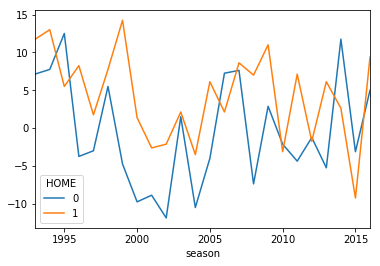

In [101]:
df.groupby(['HOME', 'season'])['margin'].mean().unstack('HOME').plot()